# Data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso

In [3]:
from sklearn.model_selection import cross_val_score

In [4]:
boston = pd.read_csv("boston_house_prices.csv")

In [5]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
X, y = boston.drop('MEDV', axis=1), boston.MEDV

In [7]:
X.shape

(506, 13)

In [8]:
y.shape

(506,)

# Ridge

## Scenario Without Polynomial Features

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.7160133196648375

In [11]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.7140510045941364

### Tuning the Hyperparameter

In [12]:
np.set_printoptions(suppress=True, precision=3)

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 13)}
print(param_grid)

{'alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])}


In [14]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])},
             return_train_score=True)

In [15]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001693,0.000455,0.001197,0.000399,0.001,{'alpha': 0.001},0.783264,0.703124,0.555585,0.732900,...,0.766419,0.747077,0.734746,0.752195,0.737612,0.749494,0.743946,0.764885,0.749152,0.009893
1,0.001496,0.000499,0.001199,0.000403,0.003162,{'alpha': 0.0031622776601683794},0.783242,0.703110,0.555572,0.733042,...,0.766419,0.747077,0.734746,0.752194,0.737612,0.749494,0.743946,0.764885,0.749152,0.009893
2,0.001886,0.000295,0.001096,0.000299,0.01,{'alpha': 0.01},0.783172,0.703064,0.555533,0.733482,...,0.766418,0.747075,0.734745,0.752194,0.737611,0.749493,0.743945,0.764884,0.749151,0.009893
3,0.001998,0.000018,0.000996,0.000018,0.031623,{'alpha': 0.03162277660168379},0.782949,0.702916,0.555412,0.734819,...,0.766412,0.747065,0.734738,0.752188,0.737603,0.749487,0.743939,0.764878,0.749144,0.009893
4,0.001403,0.000483,0.001097,0.000297,0.1,{'alpha': 0.1},0.782228,0.702439,0.555058,0.738537,...,0.766356,0.746974,0.734677,0.752133,0.737532,0.749434,0.743885,0.764819,0.749082,0.009896
5,0.001703,0.000450,0.001097,0.000300,0.316228,{'alpha': 0.31622776601683794},0.779963,0.700937,0.554191,0.746729,...,0.765964,0.746361,0.734251,0.751759,0.737039,0.749066,0.743507,0.764416,0.748658,0.009916
6,0.001696,0.000450,0.001190,0.000395,1.0,{'alpha': 1.0},0.774383,0.697210,0.553171,0.757656,...,0.764324,0.743999,0.732518,0.750244,0.735024,0.747534,0.741947,0.762809,0.746948,0.009996
7,0.001394,0.000491,0.001000,0.000009,3.162278,{'alpha': 3.1622776601683795},0.766435,0.691934,0.555942,0.765105,...,0.761140,0.739949,0.729329,0.747454,0.731312,0.744609,0.739018,0.759936,0.743822,0.010129
8,0.001707,0.000464,0.001091,0.000292,10.0,{'alpha': 10.0},0.758370,0.687116,0.569907,0.770369,...,0.757306,0.736175,0.726073,0.744474,0.727744,0.741394,0.735945,0.757140,0.740584,0.010159
9,0.001993,0.000009,0.000996,0.000003,31.622777,{'alpha': 31.622776601683793},0.743153,0.679688,0.594890,0.778256,...,0.749432,0.730400,0.720653,0.738697,0.722709,0.735645,0.730753,0.752431,0.734989,0.009830


C:\Users\tli1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\tli1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

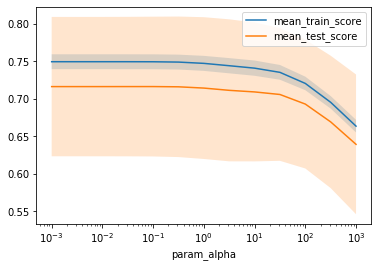

In [16]:
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [17]:
grid.best_params_

{'alpha': 0.1}

In [18]:
grid.best_score_

0.7160600746856847

## Scenario With Polynomial Features

In [19]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

In [20]:
poly = PolynomialFeatures(degree=2).fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [21]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [22]:
pipe = make_pipeline(StandardScaler(),Ridge())
ridge = pipe.fit(X_train, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test, y_test)))
ridge_poly = pipe.fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    ridge_poly.score(X_test_poly, y_test)))

Score without interactions: 0.684
Score with interactions: 0.829


In [23]:
np.mean(cross_val_score(pipe, X_train, y_train, cv=10))

0.7163173889175505

In [24]:
np.mean(cross_val_score(pipe, X_train_poly, y_train, cv=10))

0.8537775160100589

### Tuning the Hyperparameter

In [25]:
pipe = make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),Ridge())

param_grid = {'ridge__alpha': np.logspace(-3, 3, 13)}

grid = GridSearchCV(pipe, param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])},
             return_train_score=True)

In [26]:
results = pd.DataFrame(grid.cv_results_)

In [27]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005183,0.000401,0.001596,0.000488,0.001,{'ridge__alpha': 0.001},0.565386,0.776911,0.820390,0.847759,...,0.946312,0.947892,0.944132,0.947406,0.943942,0.946684,0.947744,0.949679,0.947268,0.002057
1,0.004932,0.000343,0.001506,0.000495,0.003162,{'ridge__alpha': 0.0031622776601683794},0.571989,0.773292,0.820653,0.849405,...,0.946078,0.947537,0.943683,0.946995,0.943707,0.946378,0.947494,0.949491,0.946965,0.002085
2,0.004881,0.000308,0.001218,0.000397,0.01,{'ridge__alpha': 0.01},0.578460,0.770931,0.822452,0.852910,...,0.945420,0.946678,0.942626,0.946163,0.943025,0.945646,0.946677,0.948998,0.946216,0.002181
3,0.004821,0.000334,0.001413,0.000481,0.031623,{'ridge__alpha': 0.03162277660168379},0.594707,0.771671,0.824055,0.854600,...,0.943627,0.944890,0.940308,0.944268,0.941340,0.943907,0.944763,0.947643,0.944454,0.002391
4,0.004992,0.000272,0.001115,0.000293,0.1,{'ridge__alpha': 0.1},0.649316,0.777374,0.813543,0.859417,...,0.939979,0.941550,0.936037,0.940430,0.938040,0.940324,0.941138,0.944657,0.940930,0.002651
5,0.004890,0.000317,0.001316,0.000456,0.316228,{'ridge__alpha': 0.31622776601683794},0.759034,0.784340,0.777776,0.867187,...,0.934653,0.935720,0.929009,0.934056,0.932289,0.934434,0.935073,0.939260,0.934931,0.002897
6,0.004873,0.000305,0.001411,0.000488,1.0,{'ridge__alpha': 1.0},0.861283,0.787713,0.722928,0.868506,...,0.927544,0.926056,0.918322,0.924178,0.922699,0.925277,0.925587,0.929568,0.925393,0.003206
7,0.004564,0.000510,0.001604,0.000496,3.162278,{'ridge__alpha': 3.1622776601683795},0.895571,0.796753,0.668278,0.865044,...,0.916799,0.910573,0.901673,0.908357,0.906469,0.910451,0.911051,0.913527,0.910188,0.004172
8,0.004842,0.000487,0.001411,0.000494,10.0,{'ridge__alpha': 10.0},0.878207,0.814819,0.613247,0.867102,...,0.897794,0.885422,0.875538,0.883396,0.879864,0.886709,0.887480,0.889271,0.885788,0.005788
9,0.004938,0.000375,0.001205,0.000394,31.622777,{'ridge__alpha': 31.622776601683793},0.838440,0.814703,0.558501,0.857996,...,0.866508,0.846244,0.835850,0.846244,0.839431,0.849573,0.849658,0.853202,0.848153,0.007861


C:\Users\tli1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\tli1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

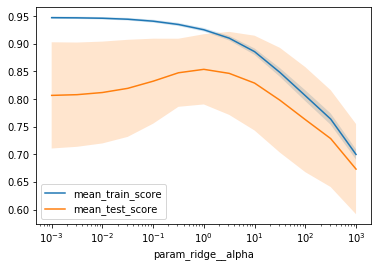

In [28]:
results.plot('param_ridge__alpha', 'mean_train_score')
results.plot('param_ridge__alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_ridge__alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_ridge__alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [29]:
print(grid.best_params_)
print(grid.best_score_)

{'ridge__alpha': 1.0}
0.8537775160100589


In [30]:
grid.score(X_test, y_test)

0.8287527733077908

## Ridge Regression Coefficients

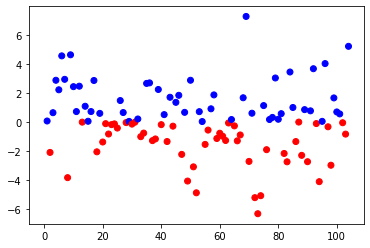

In [31]:
ridge = grid.best_estimator_
plt.scatter(range(X_train_poly.shape[1]), ridge["ridge"].coef_, c=np.sign(ridge["ridge"].coef_), cmap="bwr_r")

In [32]:
print(X_train_poly.shape)
np.sum(ridge["ridge"].coef_ != 0)

(379, 105)


104

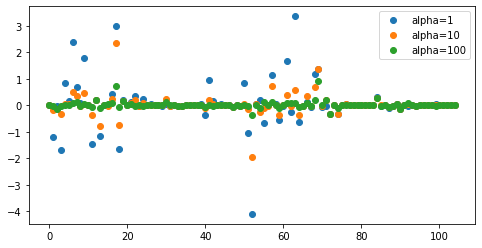

In [33]:
ridge100 = Ridge(alpha=100).fit(X_train_poly, y_train)
ridge10 = Ridge(alpha=10).fit(X_train_poly, y_train)
ridge1 = Ridge(alpha=1).fit(X_train_poly, y_train)
plt.figure(figsize=(8, 4))

plt.plot(ridge1.coef_, 'o', label="alpha=1")
plt.plot(ridge10.coef_, 'o', label="alpha=10")
plt.plot(ridge100.coef_, 'o', label="alpha=100")
plt.legend()

Text(0, 0.5, 'coefficient')

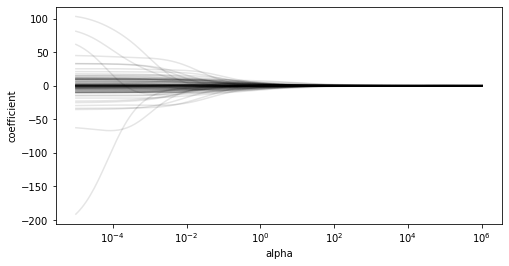

In [34]:
n_alphas = 200
alphas = np.logspace(-5, 6, n_alphas)
plt.figure(figsize=(8, 4))
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(StandardScaler().fit_transform(X_train_poly), y_train)
    coefs.append(ridge.coef_)

plt.plot(alphas, coefs, c='k', alpha=.1)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficient")

## Learning Curve

(-1, 1)

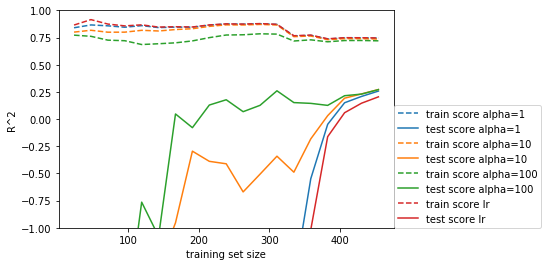

In [35]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, name):
    train_set_size, train_scores, test_scores = learning_curve(est, X, y, cv=10, train_sizes=np.linspace(0, 1, 20)[1:])
    test_mean = test_scores.mean(axis=1)
    train_mean = train_scores.mean(axis=1)
    line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score {}".format(name))
    plt.plot(train_set_size, test_mean, label="test score {}".format(name),
             c=line.get_color())
    
plot_learning_curve(Ridge(alpha=1), "alpha=1")
plot_learning_curve(Ridge(alpha=10), "alpha=10")
plot_learning_curve(Ridge(alpha=100), "alpha=100")

plot_learning_curve(LinearRegression(), "lr")
plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")
plt.ylim(-1, 1)

## Grid-searching preprocessing steps and model parameters

In [36]:
pipe = make_pipeline(PolynomialFeatures(), StandardScaler(),Ridge())

In [37]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [38]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [39]:
import pandas as pd
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_ridge__alpha', columns='param_polynomialfeatures__degree')
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))

In [40]:
res

param_polynomialfeatures__degree,1,2,3
0.001,0.716,0.798,-1.190
0.010,0.716,0.806,0.463
0.100,0.716,0.832,0.773
1.000,0.716,0.855,0.845
10.000,0.716,0.829,0.841
100.000,0.696,0.760,0.811


C:\Users\tli1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


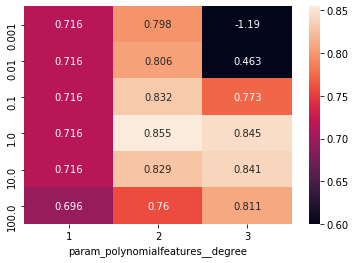

In [41]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

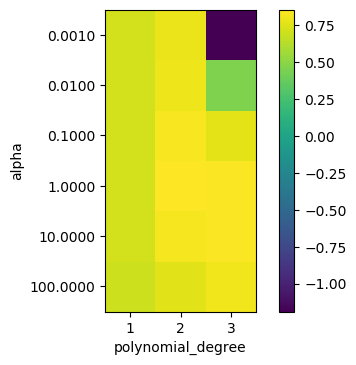

In [42]:
plt.figure(dpi=100)
plt.imshow(res) #, vmin=.70, vmax=.825)
plt.colorbar()
alphas = param_grid['ridge__alpha']
polynomial_degree = np.array(param_grid['polynomialfeatures__degree'])
plt.xlabel("polynomial_degree")
plt.ylabel("alpha")
plt.yticks(range(len(alphas)), ["{:.4f}".format(a) for a in alphas])
plt.xticks(range(len(polynomial_degree)), polynomial_degree);

In [43]:
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 1}


In [44]:
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Test-set score: 0.83


In [45]:
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Score without poly features: {:.2f}".format(grid.score(X_test, y_test)))

Score without poly features: 0.68


# Lasso

In [46]:
pipe2 = make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),Lasso(max_iter=1e6))

param_grid = {'lasso__alpha': np.logspace(-3, 0, 13)}

grid2 = GridSearchCV(pipe2, param_grid, cv=10, return_train_score=True)
grid2.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('lasso', Lasso(max_iter=1000000.0))]),
             param_grid={'lasso__alpha': array([0.001, 0.002, 0.003, 0.006, 0.01 , 0.018, 0.032, 0.056, 0.1  ,
       0.178, 0.316, 0.562, 1.   ])},
             return_train_score=True)

In [47]:
results = pd.DataFrame(grid2.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,3.535,4.924e-01,0.002,4.530e-04,0.001,{'lasso__alpha': 0.001},0.609,0.776,0.808,0.864,...,0.944,0.944,0.940,0.944,0.941,0.944,0.944,0.948,0.944,0.002
1,2.514,4.877e-01,0.002,4.002e-04,0.002,{'lasso__alpha': 0.0017782794100389228},0.622,0.779,0.797,0.864,...,0.941,0.942,0.938,0.942,0.938,0.941,0.942,0.945,0.942,0.002
2,1.178,4.504e-01,0.001,4.920e-04,0.003,{'lasso__alpha': 0.0031622776601683794},0.632,0.780,0.770,0.859,...,0.935,0.937,0.932,0.936,0.933,0.936,0.937,0.940,0.937,0.003
3,0.767,3.849e-01,0.002,4.009e-04,0.006,{'lasso__alpha': 0.005623413251903491},0.663,0.780,0.732,0.852,...,0.930,0.932,0.925,0.930,0.927,0.931,0.931,0.935,0.931,0.003
4,0.298,8.154e-02,0.002,2.953e-04,0.01,{'lasso__alpha': 0.01},0.691,0.770,0.691,0.861,...,0.922,0.926,0.916,0.923,0.921,0.923,0.924,0.927,0.923,0.003
5,0.161,4.147e-02,0.001,4.570e-04,0.018,{'lasso__alpha': 0.01778279410038923},0.762,0.773,0.634,0.870,...,0.913,0.914,0.907,0.912,0.911,0.914,0.915,0.917,0.913,0.003
6,0.106,3.325e-02,0.002,4.889e-04,0.032,{'lasso__alpha': 0.03162277660168379},0.887,0.795,0.605,0.870,...,0.904,0.899,0.891,0.896,0.893,0.898,0.900,0.901,0.899,0.004
7,0.038,4.392e-02,0.002,4.571e-04,0.056,{'lasso__alpha': 0.05623413251903491},0.882,0.812,0.558,0.872,...,0.890,0.875,0.868,0.872,0.870,0.876,0.878,0.876,0.876,0.006
8,0.010,1.685e-03,0.001,4.915e-04,0.1,{'lasso__alpha': 0.1},0.856,0.818,0.506,0.869,...,0.873,0.848,0.834,0.845,0.843,0.849,0.849,0.854,0.849,0.010
9,0.006,5.119e-04,0.001,4.530e-04,0.178,{'lasso__alpha': 0.1778279410038923},0.839,0.806,0.491,0.868,...,0.853,0.824,0.809,0.821,0.816,0.825,0.824,0.835,0.825,0.011


C:\Users\tli1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\tli1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

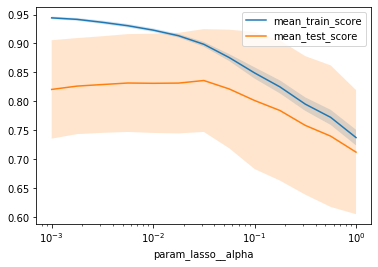

In [48]:
results.plot('param_lasso__alpha', 'mean_train_score')
results.plot('param_lasso__alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_lasso__alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_lasso__alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [49]:
print(grid2.best_params_)
print(grid2.best_score_)

{'lasso__alpha': 0.03162277660168379}
0.8359714417058427


In [50]:
grid2.score(X_test, y_test)

0.8130405334946651

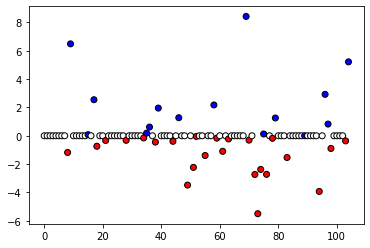

In [51]:
lasso = grid2.best_estimator_
plt.scatter(range(X_train_poly.shape[1]), lasso['lasso'].coef_, c=np.sign(lasso['lasso'].coef_), cmap="bwr_r", edgecolor='k')

In [52]:
print(X_train_poly.shape)
np.sum(lasso['lasso'].coef_ != 0)

(379, 105)


39

In [53]:
from sklearn.linear_model import lars_path
# lars_path computes the exact regularization path which is piecewise linear.
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=42)
alphas, active, coefs = lars_path(X_train, y_train, eps=0.00001, method="lasso")

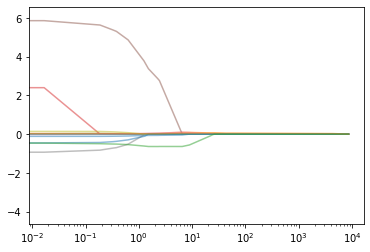

In [54]:
plt.plot(alphas, coefs.T, alpha=.5)
plt.xscale("log")

# Elastic Net

In [55]:
from sklearn.linear_model import ElasticNet

In [56]:
pipe3 = make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),ElasticNet(max_iter=100000))

param_grid = {'elasticnet__alpha': np.logspace(-3, -1, 5), 'elasticnet__l1_ratio': [0.01, .1, .5, .9, 1]}

grid3 = GridSearchCV(pipe3, param_grid, cv=10, return_train_score=True)
grid3.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('elasticnet',
                                        ElasticNet(max_iter=100000))]),
             param_grid={'elasticnet__alpha': array([0.001, 0.003, 0.01 , 0.032, 0.1  ]),
                         'elasticnet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 1]},
             return_train_score=True)

In [57]:
pd.DataFrame(grid3.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_elasticnet__alpha', 'param_elasticnet__l1_ratio', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'split5_train_score', 'split6_train_score', 'split7_train_score',
       'split8_train_score', 'split9_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [58]:
import pandas as pd
res = pd.pivot_table(pd.DataFrame(grid3.cv_results_), values='mean_test_score', index='param_elasticnet__alpha', columns='param_elasticnet__l1_ratio')
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))

In [59]:
res

param_elasticnet__l1_ratio,0.01,0.10,0.50,0.90,1.00
0.001,0.848,0.847,0.841,0.826,0.821
0.003,0.854,0.854,0.852,0.840,0.829
0.010,0.846,0.846,0.846,0.843,0.831
0.032,0.827,0.828,0.830,0.833,0.836
0.100,0.795,0.795,0.796,0.801,0.801


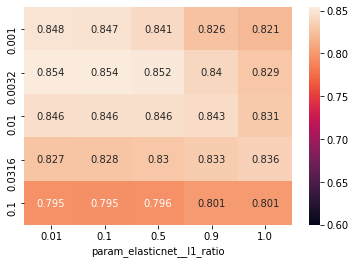

In [60]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

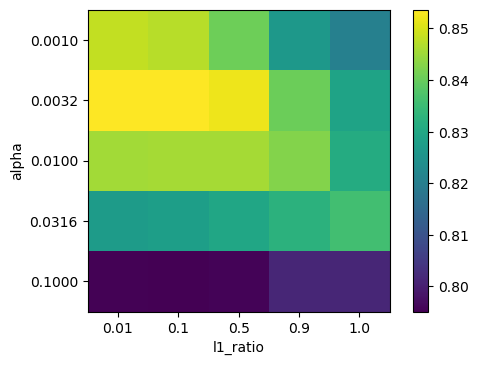

In [61]:
plt.figure(dpi=100)
plt.imshow(res) #, vmin=.70, vmax=.825)
plt.colorbar()
alphas = param_grid['elasticnet__alpha']
l1_ratio = np.array(param_grid['elasticnet__l1_ratio'])
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.yticks(range(len(alphas)), ["{:.4f}".format(a) for a in alphas])
plt.xticks(range(len(l1_ratio)), l1_ratio);

In [62]:
print(grid3.best_params_)
print(grid3.best_score_)

{'elasticnet__alpha': 0.0031622776601683794, 'elasticnet__l1_ratio': 0.01}
0.8536672691530309


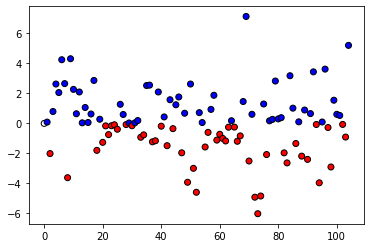

In [63]:
en = grid3.best_estimator_
plt.scatter(range(X_train_poly.shape[1]), en['elasticnet'].coef_, c=np.sign(en['elasticnet'].coef_), cmap="bwr_r", edgecolor='k')

In [64]:
print(X_train_poly.shape)
np.sum(en['elasticnet'].coef_ != 0)

(379, 105)


104

In [65]:
grid3.score(X_test, y_test)

0.8295292473167917

# Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
print("Score without interactions: {:.3f}".format(
    rf.score(X_test, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.850
Score with interactions: 0.849
